In [277]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [278]:
iris = load_iris()

In [279]:
df = pd.DataFrame(iris.data)
df.drop([2,3], axis='columns')

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


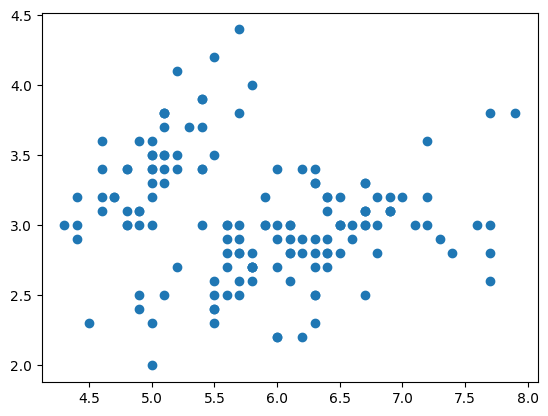

In [280]:
plt.scatter(df[0], df[1])

In [281]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[[0]])
df[0] = scaler.transform(df[[0]])
scaler.fit(df[[1]])
df[1] = scaler.transform(df[[1]])
df

,0,1,2,3
0,0.222222,0.625000,1.4,0.2
1,0.166667,0.416667,1.4,0.2
2,0.111111,0.500000,1.3,0.2
3,0.083333,0.458333,1.5,0.2
4,0.194444,0.666667,1.4,0.2
...,...,...,...,...
145,0.666667,0.416667,5.2,2.3
146,0.555556,0.208333,5.0,1.9
147,0.611111,0.416667,5.2,2.0
148,0.527778,0.583333,5.4,2.3


In [282]:
from sklearn.cluster import KMeans

k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[[0,1]])
    sse.append(km.inertia_)

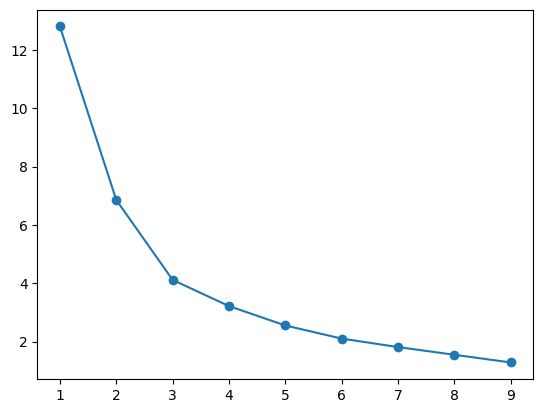

In [283]:
plt.plot(k_rng, sse, marker='o')

In [284]:
km = KMeans(n_clusters=3, n_init=10)

In [285]:
df['cluster'] = km.fit_predict(df[[0,1]])

In [286]:
df.cluster.unique()

array([2, 1, 0])

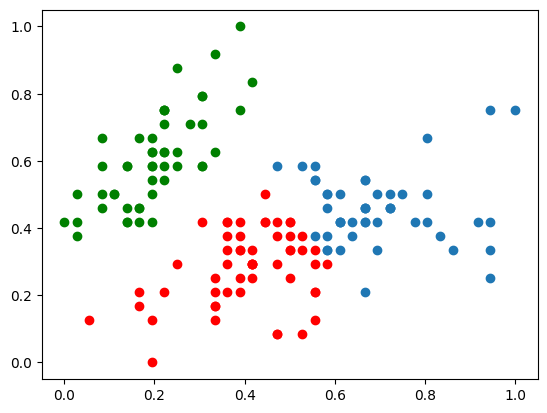

In [287]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1[0], df1[1])
plt.scatter(df2[0], df2[1], color='red')
plt.scatter(df3[0], df3[1], color='green')

In [288]:
dff = pd.DataFrame(iris.data)
dff['target'] = iris.target

In [289]:
dff

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [290]:
dff.drop([2,3], axis='columns', inplace=True)

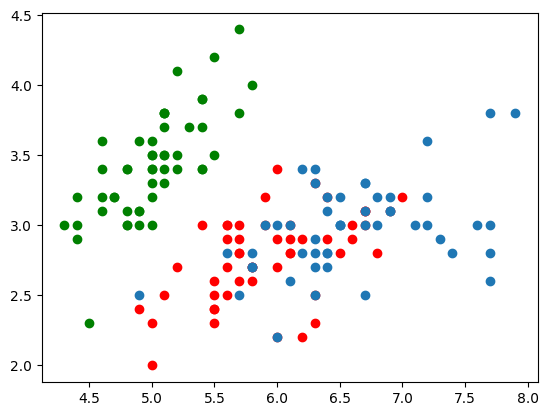

In [291]:
dff1 = dff[dff.target==0]
dff2 = dff[dff.target==1]
dff3 = dff[dff.target==2]

plt.scatter(dff1[0], dff1[1], color='green')
plt.scatter(dff2[0], dff2[1], color='red')
plt.scatter(dff3[0], dff3[1])

In [292]:
km.inertia_

4.115194202754065